# TP MACHINE LEARNING

## GRUPO: LENTZ,GONZALEZ A.,GERAGHTY

In [1]:
#IMPORTO LAS LIBRERIAS
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing


In [2]:
#ALMACENO LA RUTA DEL ARCHIVO EN UNA VARIABLE
ruta = 'walmart.csv'

In [3]:
#CREO EL DATA FRAME E IMPRIMO RESULTADOS
df = pd.read_csv(ruta)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## DESCRIPCION DE DATOS.

### 8 COLUMNAS: STORE, DATE, WEEKLY_SALES, HOLIDAY_FLAGS, TEMPERATURE, FUEL_PRICE, CPI, UNEMPLOYMENT

**STORE:** ID DE TIENDA

**DATE:** FECHA DE RECOPILACION DE DATOS

**WEEKLY_SALES:** VENTAS SEMANALES

**HOLIDAY_FLAGS:** IDENTIFICA LOS FERIADOS EN CASO DE HABERLOS

**TEMPERATURE:** TEMPERATURA SEMANAL EN PROMEDIO

**FUEL_PRICE:** PRECIO DE COMBUSTIBLE

**CPI:** INDICE DE PRECIO AL CONSUMIDOR

**UNEMPLOYMENT:** INDICE DE DESEMPLEO

### SE INTENTARA MODELAR PARA PREDECIR EL UNEMPLOYMENT (DESEMPLEO) EN FUNCION DE OTRAS VARIABLES

In [4]:
# Tamaño del data
df.shape


(6435, 8)

In [5]:
# Descripcion de la data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Comprueba si faltan datos
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

### LOS DATOS PARECEN ESTAR COMPLETOS, SIN FALTANTES

## SE PROCEDERA A ARMARLA MATRIZ CORRELACION DE LAS COLUMNAS NUMERICAS

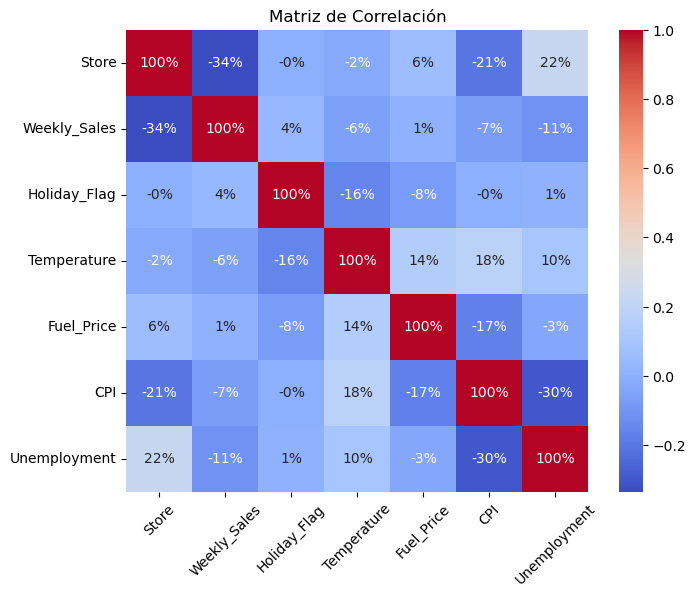

In [7]:

# Selecciona las columnas numericas
df_numeric = df.select_dtypes(include=['number'])

# Calcula la matriz 
corr = df_numeric.corr()

# Crea un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True,fmt='.0%', cmap="coolwarm", cbar=True, square=True)

# Titulo
plt.title("Matriz de Correlación")

# Rotacion de ejes X e Y
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostra el mapa de calor
plt.show()


In [8]:
# Busca la correlacion con el desempleo
corr['Unemployment'].abs().sort_values(ascending=True)

Holiday_Flag    0.010960
Fuel_Price      0.034684
Temperature     0.101158
Weekly_Sales    0.106176
Store           0.223531
CPI             0.302020
Unemployment    1.000000
Name: Unemployment, dtype: float64

**REALIZAREMOS NUESTRO MODELO A PARTIR DE CPI, STORE y WEEKLY_SALES.... YA QUE UNA CORRELACION MENOR A 0.1 NO PARECE MUY DETERMINANTE PARA MODELAR EL INCICE DE DESEMPLEO**

In [9]:
def grafico(df, columna):
    # Recibe un DataFrame y una columna a graficar
    plt.figure(figsize=(8, 6))  # Aumentar el tamaño del gráfico
    plt.title("Distribución de " + columna)  # Título más descriptivo

    sns.histplot(data=df[columna], kde=True, color="red", alpha=0.5)

    # Añadir etiquetas de los ejes
    plt.xlabel(columna)
    plt.ylabel("Count")

    # Añadir líneas verticales para valores estadísticos (opcional)
    mean_value = df[columna].mean()
    median_value = df[columna].median()
    plt.axvline(mean_value, color='green', linestyle='dashed', linewidth=2, label='Media')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label='Promedio')

    # Añadir una leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()



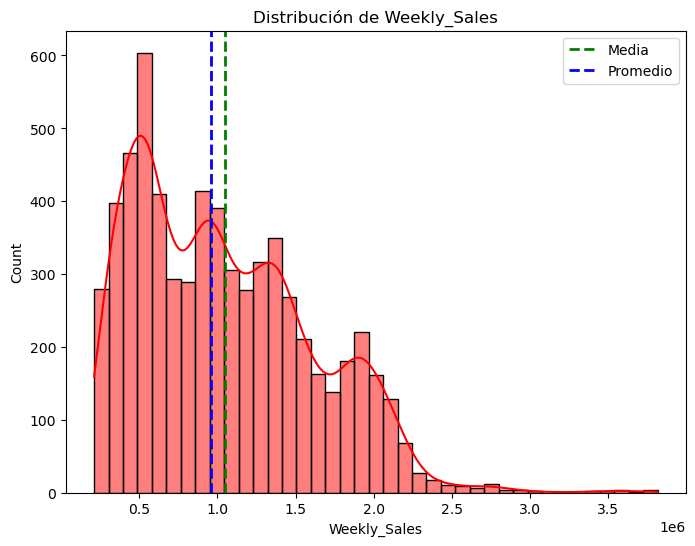

In [10]:
grafico(df,'Weekly_Sales')


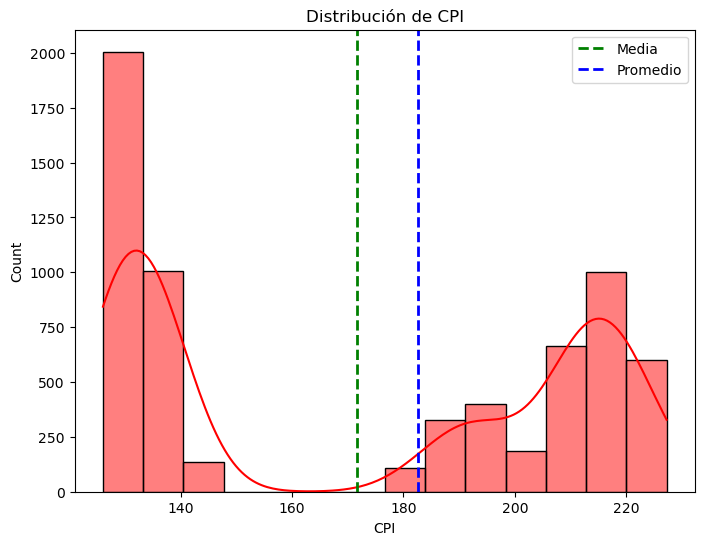

In [11]:
grafico(df,'CPI')

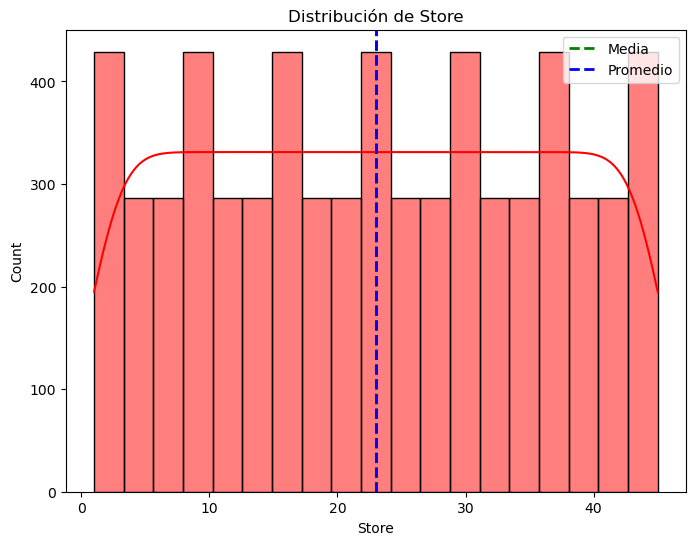

In [12]:
grafico(df,'Store')

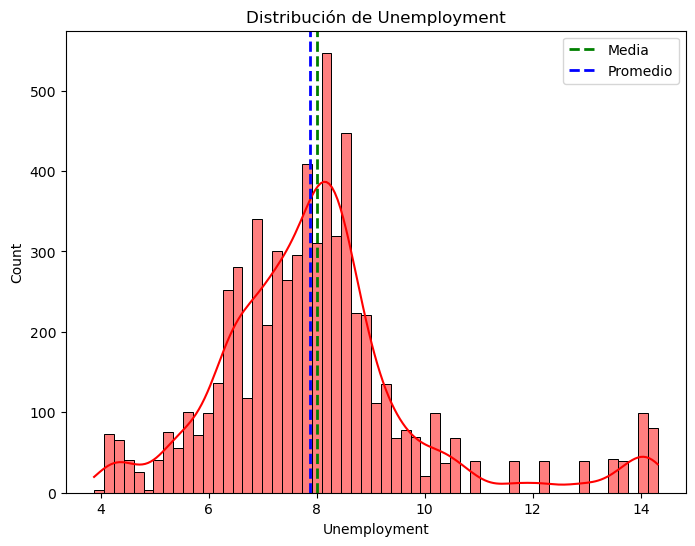

In [13]:
grafico(df,'Unemployment')

## SE ELIMINAN COLUMNAS INNECESARIAS

In [14]:
# Se eliminan columnas que no tienen relacion con el desempleo
df = df.drop(['Date'], axis = 1)
df = df.drop(['Holiday_Flag'], axis = 1)
df = df.drop(['Temperature'], axis = 1)
df = df.drop(['Fuel_Price'], axis = 1)

## ESCALANDO DATOS

**SE REALIZARAN DISTINTAS NORMALIZACIONES PARA VER EL IMPACTO EN EL MODELO. SE NORMALIZARAN VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [15]:
# Primera normalización 
escala = preprocessing.Normalizer(norm = 'l2', copy = True)

In [16]:

# Se crea otro datafreme para no modificar el original
df_norm = pd.DataFrame(df)

In [17]:

df_norm = escala.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)

In [18]:
# Muesta del DataFrame normalizado
df_norm

,Store,Weekly_Sales,CPI,Unemployment
0,6.083869e-07,1.0,0.000128,0.000005
1,6.090292e-07,1.0,0.000129,0.000005
2,6.203596e-07,1.0,0.000131,0.000005
3,7.093569e-07,1.0,0.000150,0.000006
4,6.431668e-07,1.0,0.000136,0.000005
...,...,...,...,...
6430,6.309821e-05,1.0,0.000269,0.000012
6431,6.135345e-05,1.0,0.000262,0.000012
6432,6.126914e-05,1.0,0.000262,0.000012
6433,6.266314e-05,1.0,0.000268,0.000012


In [19]:
# Se separan la variable dependiente de las independientes
X = df_norm[['CPI',"Store","Weekly_Sales"]].values
y = df_norm['Unemployment'].values

In [20]:
# Media de Unemployment del dato 
y.mean()

1.0791370040800865e-05

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Muesta de como se ven los datos
X_train

array([[1.40878296e-04, 3.76894296e-05, 9.99999989e-01],
       [1.33091521e-04, 2.85732576e-05, 9.99999991e-01],
       [9.35910761e-05, 1.63342648e-05, 9.99999995e-01],
       ...,
       [1.33676329e-04, 1.24118597e-05, 9.99999991e-01],
       [1.00703591e-04, 1.44120244e-05, 9.99999995e-01],
       [1.07658578e-04, 1.05611291e-05, 9.99999994e-01]])

In [23]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
df_norm = df_norm.drop(['Unemployment'], axis=1)
df_norm = df_norm.T
df_norm = df_norm.index

In [25]:
# Coeficientes elegidos por el modelo
coeff_df = pd.DataFrame(regressor.coef_, df_norm, columns=['Coefficient']) 
coeff_df

,Coefficient
Store,0.029499
Weekly_Sales,0.111380
CPI,20.039012


In [26]:
# Prediccion de los datos
y_pred = regressor.predict(X_test)

In [27]:
df_comparativo = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_comparativo.head(25)
df1.head()
df1.sort_values('Actual')

,Actual,Predicted
15,0.000004,0.000004
16,0.000005,0.000005
7,0.000005,0.000008
24,0.000005,0.000006
8,0.000005,0.000007
17,0.000005,0.000008
1,0.000006,0.000008
13,0.000007,0.000006
5,0.000009,0.000008
19,0.000010,0.000010


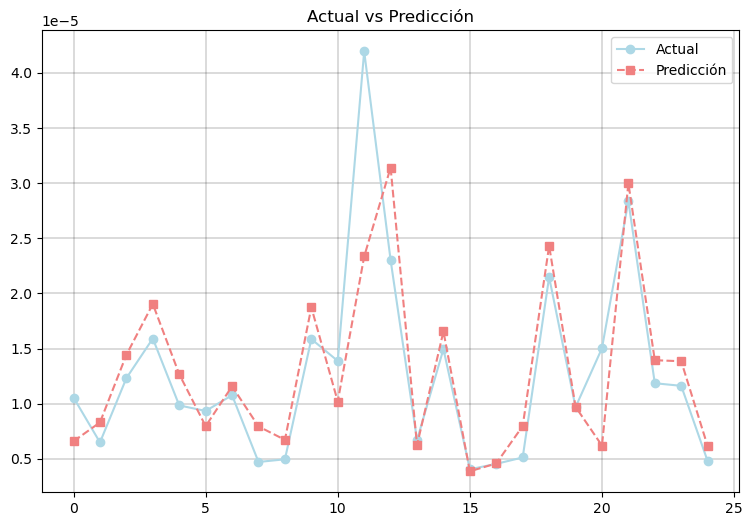

In [28]:

# Crear un gráfico de líneas
plt.figure(figsize=(9, 6))
plt.plot(df1.index, df1['Actual'], label='Actual', marker='o', linestyle='-', color='lightblue')
plt.plot(df1.index, df1['Predicted'], label='Predicción', marker='s', linestyle='--', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')

# Título del gráfico
plt.title("Actual vs Predicción")

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

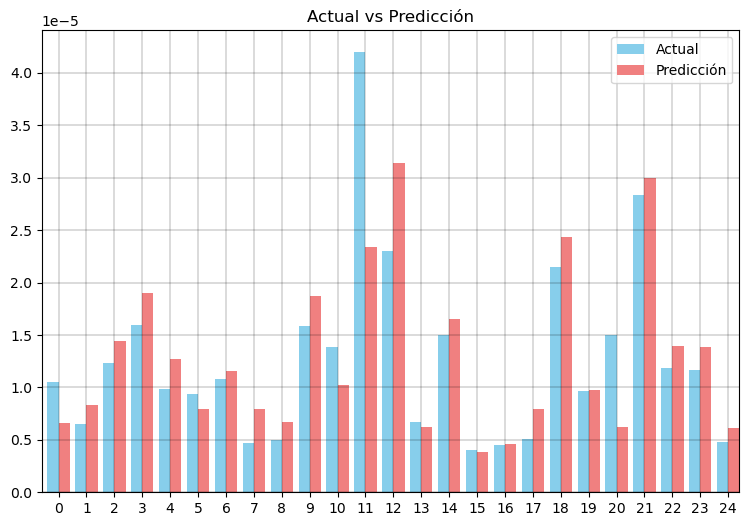

In [29]:

# Crear un rango de índices para las barras
index = range(len(df1))

# Configurar las etiquetas del eje X
x_labels = [str(i) for i in index]

# Crear la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Ancho de las barras
bar_width = 0.4

# Barras de 'Actual'
actual_bars = ax.bar(index, df1['Actual'], bar_width, label='Actual', color='skyblue')

# Barras de 'Predicción'
prediction_bars = ax.bar([i + bar_width for i in index], df1['Predicted'], bar_width, label='Predicción', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')


# Título del gráfico
plt.title("Actual vs Predicción")

# Ajustar los límites del eje X para agregar espacio en los márgenes
ax.set_xlim([-0.4, len(index) - 0.4])

# Establecer las etiquetas del eje X
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.445730671994416e-06
Mean Squared Error: 1.3748397017404402e-11
Root Mean Squared Error: 3.707883091118759e-06


**primer Resultado:** El error cuadratico medio es de 3.707883091118759e-06 respecto a la media normalizada de y 1.0791370040800865e-05

In [31]:
# Segunda normalización 
# Solo se normalizará la variable independiente.
escala2 = preprocessing.Normalizer(norm = 'l2', copy = True)
df_norm2 = pd.DataFrame(df)
df_norm2[['Store','Weekly_Sales','CPI']] = escala.fit_transform(df[['Store','Weekly_Sales','CPI']])
df_norm2 = pd.DataFrame(df_norm2, columns=df.columns)

In [32]:
X = df_norm2[['Store','Weekly_Sales','CPI']].values
y = df_norm2['Unemployment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
df_norm2 = df_norm2.drop(['Unemployment'], axis=1)
df_norm2 = df_norm2.T
df_norm2 = df_norm2.index

In [34]:
# Coeficientes elegidos por el modelo
coeff_df = pd.DataFrame(regressor.coef_, df_norm2, columns=['Coefficient']) 
coeff_df

,Coefficient
Store,1.759436e+04
Weekly_Sales,7.127437e+06
CPI,-7.467005e+02


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df_comparativo2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df_comparativo2.head(25)
df2.head()
df2.sort_values('Actual')

,Actual,Predicted
24,5.892,8.086905
12,6.078,9.480602
8,6.123,7.744540
2,6.232,7.613313
14,6.339,7.462614
7,6.565,8.060868
15,6.943,7.904540
6,6.986,7.782807
17,7.057,8.064611
4,7.082,7.961546


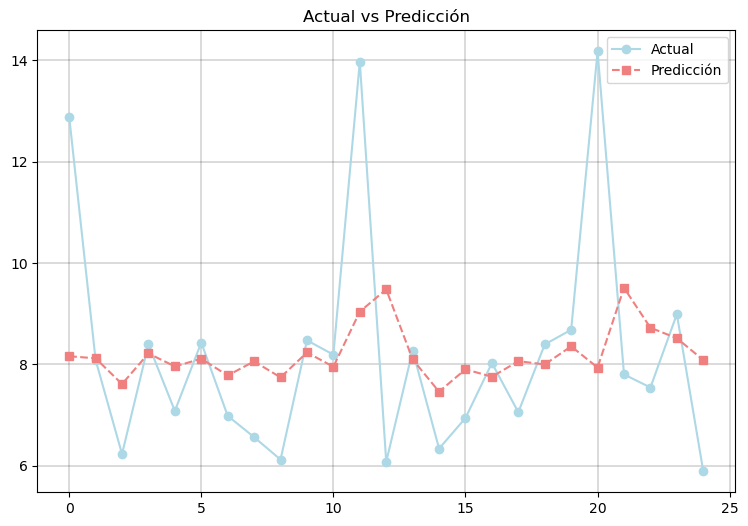

In [37]:
# Crear un gráfico de líneas
plt.figure(figsize=(9, 6))
plt.plot(df2.index, df2['Actual'], label='Actual', marker='o', linestyle='-', color='lightblue')
plt.plot(df2.index, df2['Predicted'], label='Predicción', marker='s', linestyle='--', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')

# Título del gráfico
plt.title("Actual vs Predicción")

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

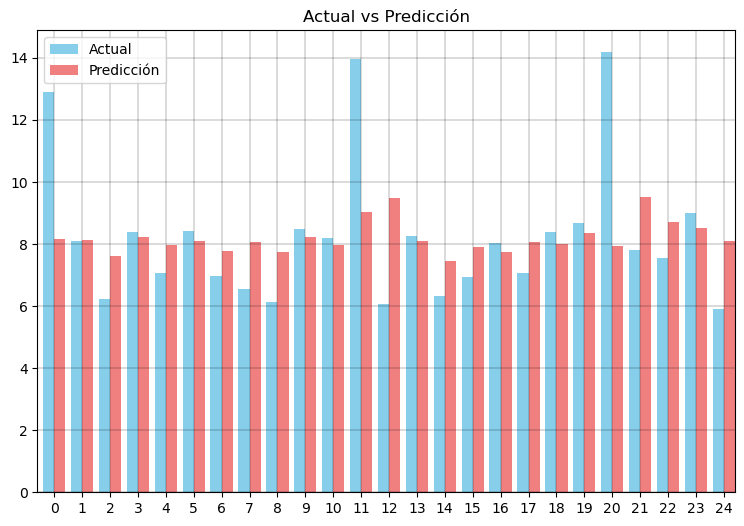

In [38]:
# Crear un rango de índices para las barras
index = range(len(df1))

# Configurar las etiquetas del eje X
x_labels = [str(i) for i in index]

# Crear la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Ancho de las barras
bar_width = 0.4

# Barras de 'Actual'
actual_bars = ax.bar(index, df2['Actual'], bar_width, label='Actual', color='skyblue')

# Barras de 'Predicción'
prediction_bars = ax.bar([i + bar_width for i in index], df2['Predicted'], bar_width, label='Predicción', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')


# Título del gráfico
plt.title("Actual vs Predicción")

# Ajustar los límites del eje X para agregar espacio en los márgenes
ax.set_xlim([-0.4, len(index) - 0.4])

# Establecer las etiquetas del eje X
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels)

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [39]:
y.mean()

7.99915104895105

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2128702165657232
Mean Squared Error: 3.2476812649027953
Root Mean Squared Error: 1.802132421578058


**Segundo Resultado:** El error cuadratico medio es de 1.802132421578058 respecto a la media normalizada de y 7.99915104895105

In [41]:
# TERCER NORMALIZACION Crear una copia del DataFrame
df_norm = df.copy()

# Seleccionar las características que deseas normalizar
features_to_normalize = ['Store', 'Weekly_Sales', 'CPI']

# Crear un objeto StandardScaler
scaler = StandardScaler()

In [42]:
# Ajustar el escalador a las características seleccionadas y transformar los datos
df_norm[features_to_normalize] = scaler.fit_transform(df_norm[features_to_normalize])

# Separar las características y la variable objetivo
X = df_norm[features_to_normalize].values
y = df_norm['Unemployment'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un modelo de regresión lineal
regressor = LinearRegression()

In [43]:
# Entrenar el modelo
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Crear un DataFrame para comparar las predicciones con los valores reales
df_comparativo = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [44]:
# Mostrar las primeras 25 filas del DataFrame de comparación
df3 = df_comparativo.head(25)
df3.sort_values('Actual')

,Actual,Predicted
24,5.892,8.086905
12,6.078,9.480602
8,6.123,7.744540
2,6.232,7.613313
14,6.339,7.462614
7,6.565,8.060868
15,6.943,7.904540
6,6.986,7.782807
17,7.057,8.064611
4,7.082,7.961546


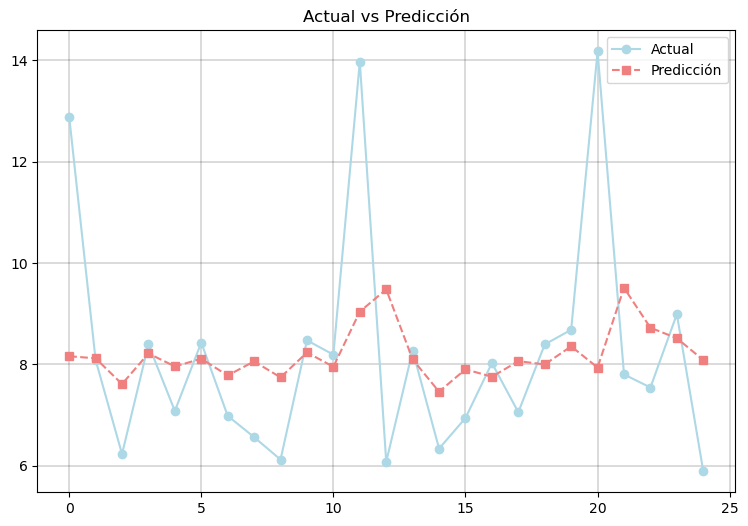

In [45]:
# Crear un gráfico de líneas
plt.figure(figsize=(9, 6))
plt.plot(df3.index, df3['Actual'], label='Actual', marker='o', linestyle='-', color='lightblue')
plt.plot(df3.index, df3['Predicted'], label='Predicción', marker='s', linestyle='--', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')

# Título del gráfico
plt.title("Actual vs Predicción")

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

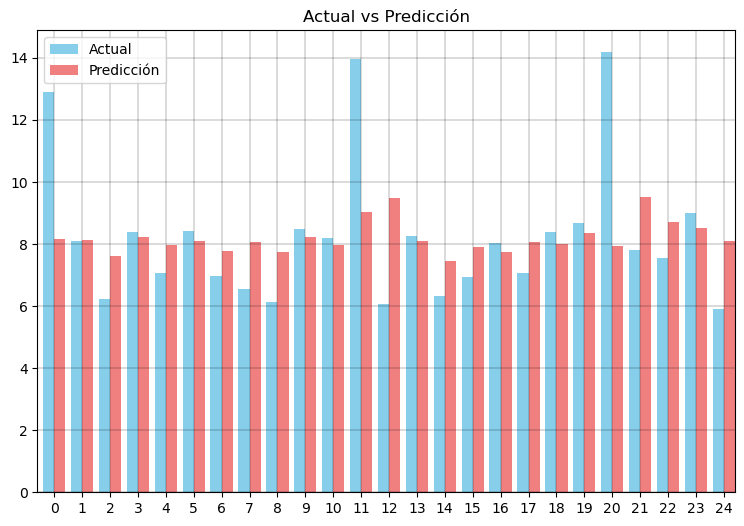

In [46]:
# Crear un rango de índices para las barras
index = range(len(df1))

# Configurar las etiquetas del eje X
x_labels = [str(i) for i in index]

# Crear la figura
fig, ax = plt.subplots(figsize=(9, 6))

# Ancho de las barras
bar_width = 0.4

# Barras de 'Actual'
actual_bars = ax.bar(index, df3['Actual'], bar_width, label='Actual', color='skyblue')

# Barras de 'Predicción'
prediction_bars = ax.bar([i + bar_width for i in index], df3['Predicted'], bar_width, label='Predicción', color='lightcoral')

# Configurar la cuadrícula
plt.grid(which='major', linestyle='-', linewidth=0.2, color='black')


# Título del gráfico
plt.title("Actual vs Predicción")

# Ajustar los límites del eje X para agregar espacio en los márgenes
ax.set_xlim([-0.4, len(index) - 0.4])

# Establecer las etiquetas del eje X
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(x_labels)

# Leyenda
plt.legend()


# Mostrar el gráfico
plt.show()

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2128702166046295
Mean Squared Error: 3.247681264743017
Root Mean Squared Error: 1.8021324215337275


**tercer Resultado:** El error cuadratico medio es de 1.8021324215337275 respecto a la media normalizada de y 7.99915104895105

### Conclusion:

Se analizó el dataset waltmart.csv al cual se le aplicaron varias normalizaciones para ver cual se adaptaba mejor a los datos.

__Primer Resultado:__ El error cuadratico medio es de 3.7078830910033194e-06 respecto a la media normalizada de y 1.0791370040800865e-05

__Segundo Resultado:__ El error cuadratico medio es de 1.802132421578058  respecto a la media normalizada de y 7.99915104895105

__Tercer Resultado:__ similar al segundo (datos)

Se puede llegar a la conclusión de que el tercer algoritmo implementado es más preciso que los otros dos.
A pesar de esto aún esta lejos de ser perfecto pese a que puede hacer algunas predicciones buenas.

Los factores a los que se le pueden haber atribuir la inexactitud son:

1. Baja correlación entre los valores
2. La suposición de que estos datos tienen una relación lineal puede no ser cierta.
3. Valores fuera de rango. Se puede observar que hay valores que se escapan por mucho de la media generando mucha distorsión